In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from leela_interp.core.effect_study import *
from leela_interp.core.alternative_moves import *
from leela_interp.core.double_branch import *

In [3]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")
model = Lc0sight("lc0.onnx", device=device)

Using device: cpu


In [9]:
study = GeneralStudy(puzzlename="nomate2")

No residual stream results found.
No attention head results found.


In [10]:
len(study.puzzles)

327938

In [11]:
import pandas as pd

In [12]:
puzzles = pd.read_csv("lichess_db_puzzle.csv")

In [14]:
puzzles["principal_variation"] = pd.Series(
    [p.Moves.split(" ")[1:] for p in puzzles.itertuples()], index=puzzles.index
)
pv_length = puzzles["principal_variation"].apply(len)
puzzles = puzzles[pv_length == 3]
print("Number of puzzles with PV length 3:", len(puzzles))

puzzles = puzzles[puzzles.Themes.apply(lambda x: "mateIn2" not in x)]
print("Number of puzzles without mateIn2 in Themes:", len(puzzles))


Number of puzzles with PV length 3: 2239735
Number of puzzles without mateIn2 in Themes: 1764393


KeyError: 'sparring_full_pv_probs'

In [15]:
small_model = Lc0Model("LD2.onnx", device="cuda")

Using device: cuda


In [16]:
from leela_interp import get_lc0_pv_probabilities

In [18]:
(
    puzzles["sparring_full_pv_probs"],
    puzzles["sparring_full_model_moves"],
    puzzles["sparring_wdl"],
) = get_lc0_pv_probabilities(small_model, puzzles, batch_size=2048*4)

Running Lc0 on 1764393 puzzles in 215 batches


  0%|          | 0/216 [00:00<?, ?it/s]

  1%|▏         | 3/216 [01:17<1:31:35, 25.80s/it]


KeyboardInterrupt: 

In [ ]:

sparring_first_prob = puzzles["sparring_full_pv_probs"].apply(lambda x: x[0])
sparring_second_prob = puzzles["sparring_full_pv_probs"].apply(lambda x: x[1])

#hard = sparring_first_prob < 0.05
#forcing = sparring_second_prob > 0.7
#interesting_0 = hard & forcing

# puzzles = puzzles[interesting_0]
print("Number of puzzles with hard and forcing second move:", len(puzzles))

#interesting_1 = puzzles["Themes"].apply(lambda x: "mateIn2" in x)
interesting_2 = puzzles["full_pv_probs"].apply(lambda x: 0.3 < x[0] < 0.6)
puzzles = puzzles[interesting_2]
print("Number of puzzles with first move between 0.3 and 0.6:", len(puzzles))

interesting_2B = puzzles["full_pv_probs"].apply(lambda x: 0.7 < x[2])
puzzles = puzzles[interesting_2B]
print("Number of puzzles with third move probability greater than 0.8:", len(puzzles))

In [7]:
study.export_with_puzzle_mask(puzzles, "allfiltered")

# Finding double branches

In [29]:
study = GeneralStudy(puzzlename="double")

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/general_study.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.all_effects = -torch.load(
/home/dcruz/Pivotal

In [44]:
filtered_puzzles = DoubleBranchStudy.check_if_double_branch(model, study.puzzles, end=3, min_prob=[0.3, 0.7, 0.7])

Checking double games:   0%|          | 0/11813 [00:00<?, ?it/s]

Checking double games: 100%|██████████| 11813/11813 [17:17<00:00, 11.39it/s]

Puzzles that are double games: 903
Puzzles with PV: 829
Puzzles with 4 distinct moves: 430


In [51]:
study.export_with_puzzle_mask(filtered_puzzles, "doublefiltered")

In [52]:
study = DoubleBranchStudy(puzzlename="doublefiltered", load_sets=False)

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/general_study.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.all_effects = -torch.load(
/home/dcruz/Pivotal

In [31]:
study.find_result_sets(include_starting=False, n_examples=1)
study.export_puzzle_set_info()

In [8]:
study = GeneralStudy(puzzlename="allfiltered")
filtered_puzzles = DoubleBranchStudy.check_if_double_branch(model, study.puzzles, end=3, min_prob=[0.3, 0.7, 0.7])

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/general_study.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.all_effects = -torch.load(
/home/dcruz/Pivotal

Checking double games: 100%|██████████| 4018/4018 [01:03<00:00, 62.98it/s]

Puzzles that are double games: 97
Puzzles with PV: 84
Puzzles with 4 distinct moves: 30


In [ ]:
study.export_with_puzzle_mask(filtered_puzzles, "allfiltered")


In [4]:
study = DoubleBranchStudy(puzzlename="nomate3", load_sets=False)
study.find_result_sets(include_starting=False, n_examples=1)
study.export_puzzle_set_info()

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/general_study.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.all_effects = -torch.load(
/home/dcruz/Pivotal

# Global activation patching

In [5]:
study = DoubleBranchStudy(puzzlename="nomate3", load_all=True)

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/general_study.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.all_effects = -torch.load(
/home/dcruz/Pivotal

122345 6 6
112334 16 10
123456 29 10
112344 12 10
123445 11 10
112345 14 10
123425 16 10
122334 7 7
123455 13 10


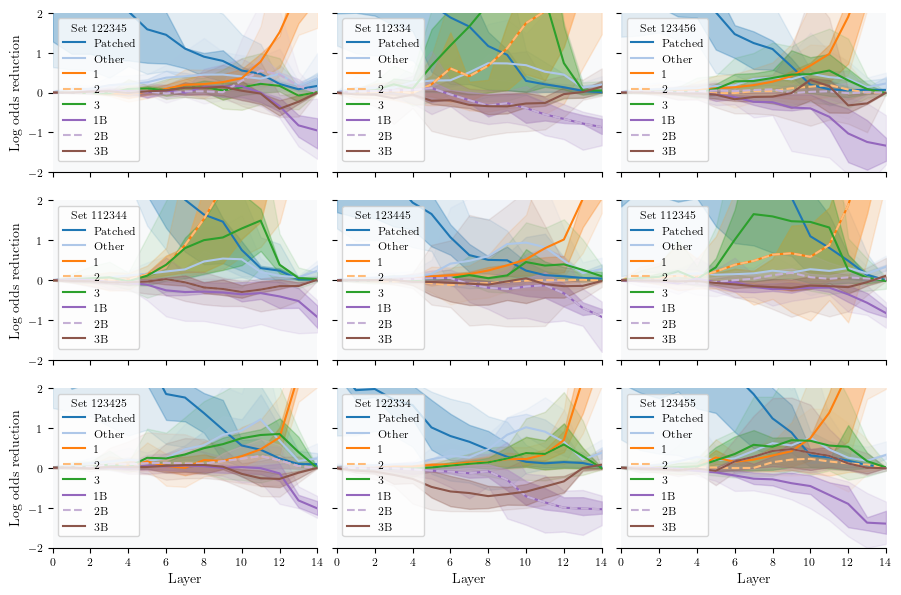

In [7]:
possibilities = study.get_possibility_list('b', lengths=[3])
study.plot_residual_effects_grid('b', possibilities, n_cols=3)

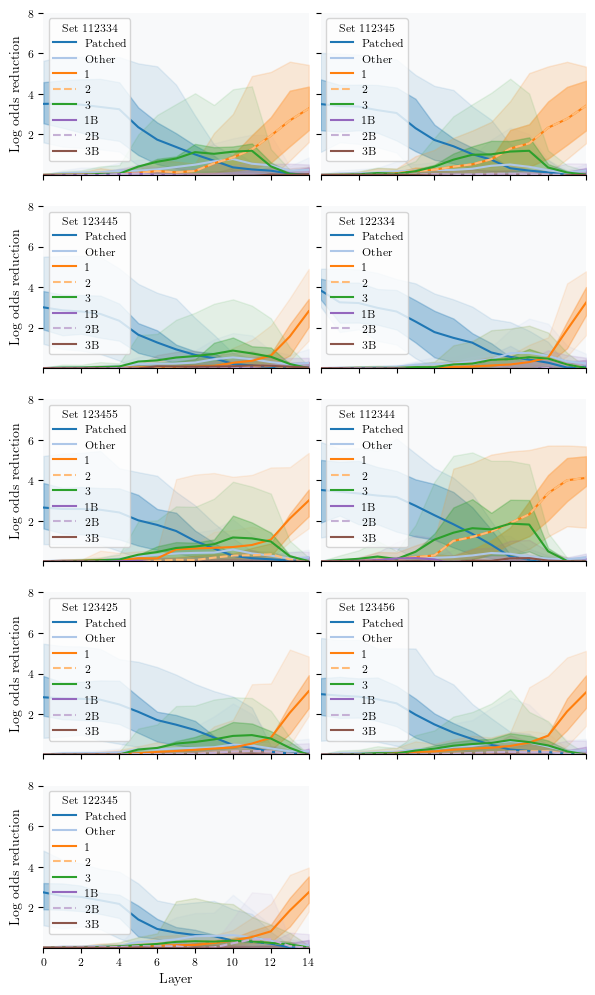

In [6]:
possibilities = study.get_possibility_list('b', lengths=[3])
study.plot_residual_effects_grid('b', possibilities, n_cols=2)

In [53]:
branch_1_probs = np.vstack(study.puzzle_sets['b']['123456'].branch_1_probs.to_numpy())
branch_2_probs = np.vstack(study.puzzle_sets['b']['123456'].branch_2_probs.to_numpy())
branch_probs = np.vstack((branch_1_probs[:, 0], branch_2_probs[:, 0])).T
sorted_indices = np.argsort(branch_probs[:, 0] - branch_probs[:, 1])

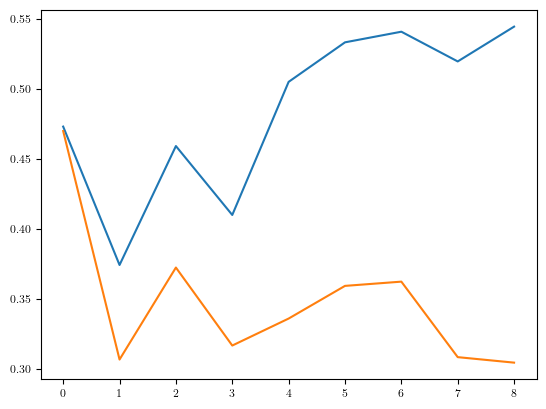

In [54]:
sorted_indices = np.argsort(branch_probs[:, 0] - branch_probs[:, 1])
plt.plot(branch_probs[sorted_indices])
plt.show()

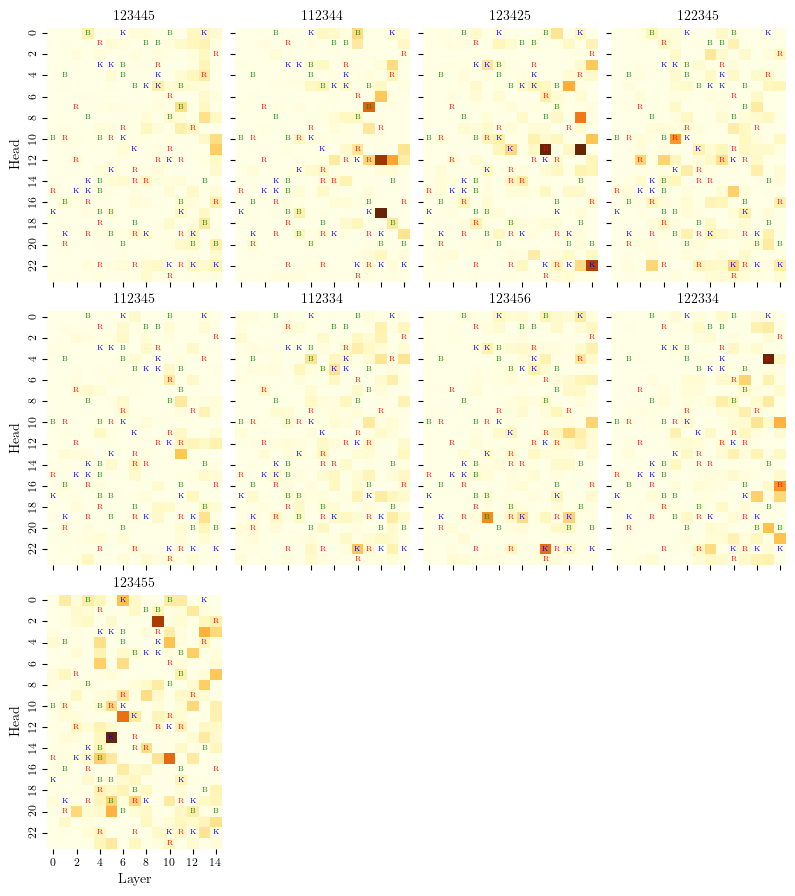

In [55]:
study.plot_attention_grid('b', possibilities, n_cols=4)

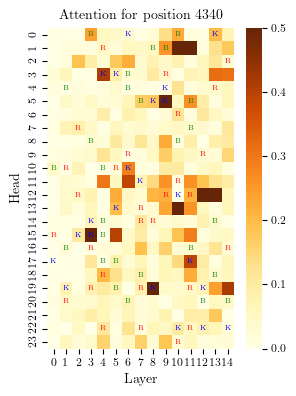

In [116]:
study.plot_attention(puzzle_pos, mask_index)

{'f8c7': 0.1706513613462448, 'b8c7': 0.1142272874712944, 'f8e7': -0.09654686599969864, 'b8e7': -0.031023822724819183, 'e7f5': -0.00550730200484395}


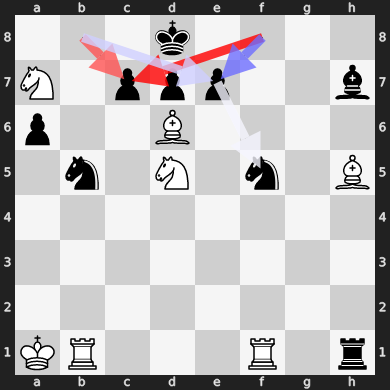

In [307]:
attribution = attention_attribution(
    [good_board], layer=12, head=12, model=model, return_pt=True
)[0]
values, colors = top_k_attributions(attribution, good_board, k=5)
print(values)
good_board.plot(arrows=colors, show_lastmove=False)

In [73]:
from leela_interp.tools.attention import attention_attribution, top_k_attributions
from leela_interp.tools.patching import activation_patch

In [41]:
study.all_attentions[mask].shape

torch.Size([1, 15, 24])

In [52]:
diogo_third_to_first_vs_other_ablations(model, board, puzzle, 12, 12)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 11.83it/s]


(12, 12) [0]


100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


(tensor([0.3869]), tensor([-0.1667]))

# L12H17

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:1118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + se

112334 L12H12


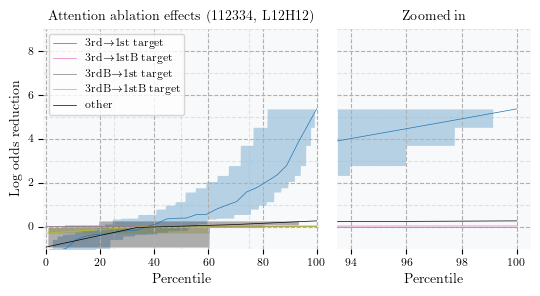

In [58]:
ablation_configs = [
    (['L12H12'], "112334")
]

for cases, puzzle_set in ablation_configs:
    for case in cases:
        ablation_study = AblationStudy(folder_name=case + "_" + puzzle_set)
        print(puzzle_set, case)
        ablation_study.plot_ablation_effects(filename=f"ablation_effects_{case}_{puzzle_set}.pdf", puzzle_set=puzzle_set, LH=case)

In [60]:
from leela_interp.core.probing_study import *

In [61]:
cases = ['112334']

for case in cases:
    probing_study = ProbingStudy(case_number=case, puzzlename="nomate2")
    print(probing_study.n_examples)
    probing_study.plot_probe_results()

FileNotFoundError: [Errno 2] No such file or directory: 'results/probing_112334/all/0/3/main.pkl'